<a href="https://colab.research.google.com/github/PinskayaNika/MMO_Pinskaya/blob/main/%D0%9B%D0%A02/%D0%9B%D0%A02_%D0%9C%D0%9C%D0%9E_%D0%9F%D0%B8%D0%BD%D1%81%D0%BA%D0%B0%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №2
## "**Обработка признаков (часть 1)**"

Выполнила: Пинская Н.М.  
Группа: ИУ5-21М  

  
  
**Цель лабораторной работы:** изучение продвинутых способов предварительной обработки данных для дальнейшего формирования моделей.  

  
**Задание:**  

1.   Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.
2.   Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:  
*   устранение пропусков в данных;
*   кодирование категориальных признаков;
*   нормализацию числовых признаков.

In [39]:
#импортируем библиотеки
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
# from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
sns.set(style="ticks")

In [40]:
# Подключение к gogle диску
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
# Вывод содержимого папки на диске
import os
data_root = '/content/drive/MyDrive/MMO'
print(os.listdir(data_root))

['pulitzer-circulation-data.csv', 'mmsa-icu-beds2.csv', 'movies.csv.zip', 'movies2.csv.zip', 'movies1.csv.zip', 'avengers.csv.zip', 'comma-survey.csv.zip', 'Tweets.csv.zip', 'BX-CSV-DUMP', 'rekko_challenge_rekko_challenge_2019', 'books.csv', 'laptop.csv']


## Устранение пропусков в данных

In [42]:
skip = pd.read_csv('/content/drive/MyDrive/MMO/laptop.csv', sep=",")

In [43]:
skip.shape

(130, 11)

In [44]:
list(zip(skip.columns, [i for i in skip.dtypes]))

[('Unnamed: 0', dtype('int64')),
 ('Brand', dtype('O')),
 ('Model', dtype('O')),
 ('Series', dtype('O')),
 ('Processor', dtype('O')),
 ('Processor_Gen', dtype('O')),
 ('RAM', dtype('float64')),
 ('Hard_Disk_Capacity', dtype('O')),
 ('OS', dtype('O')),
 ('Rating', dtype('float64')),
 ('Price', dtype('int64'))]

In [45]:
# Колонки с пропусками
hcols_with_na = [c for c in skip.columns if skip[c].isnull().sum() > 0]
hcols_with_na

['Model',
 'Series',
 'Processor',
 'Processor_Gen',
 'RAM',
 'Hard_Disk_Capacity',
 'OS']

In [46]:
skip.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [47]:
# Количество пропусков
[(c, skip[c].isnull().sum()) for c in hcols_with_na]

[('Model', 14),
 ('Series', 50),
 ('Processor', 7),
 ('Processor_Gen', 7),
 ('RAM', 8),
 ('Hard_Disk_Capacity', 8),
 ('OS', 8)]

In [48]:
# Вычислим процент (долю) пропусков
[(col, skip[col].isnull().mean()) for col in hcols_with_na]

[('Model', 0.1076923076923077),
 ('Series', 0.38461538461538464),
 ('Processor', 0.05384615384615385),
 ('Processor_Gen', 0.05384615384615385),
 ('RAM', 0.06153846153846154),
 ('Hard_Disk_Capacity', 0.06153846153846154),
 ('OS', 0.06153846153846154)]

Пропусков в колонках достаточно много, будем работать с колонками Процессора (Processor), Поколения процессора (Processor_Gen) и Памяти (RAM). У них процент пропусков наименьший.

In [49]:
# Колонки для которых удаляются пропуски
hcols_with_na_temp = ['Processor', 'Processor_Gen', 'RAM']

### Удаление для группы колонок  
Удаление колонок, содержащих пустые значения res = data.dropna(axis=1, how='any')



In [50]:
# Удаление пропусков
skip_drop = skip[hcols_with_na_temp].dropna()
skip_drop.shape

(122, 3)

In [51]:
def plot_hist_diff(old_ds, new_ds, cols):
    """
    Разница между распределениями до и после устранения пропусков
    """
    for c in cols:   
        fig = plt.figure()
        ax = fig.add_subplot(111)
        ax.title.set_text('Поле - ' + str(c))
        old_ds[c].hist(bins=50, ax=ax, density=True, color='green')
        new_ds[c].hist(bins=50, ax=ax, color='blue', density=True, alpha=0.5)
        plt.show()

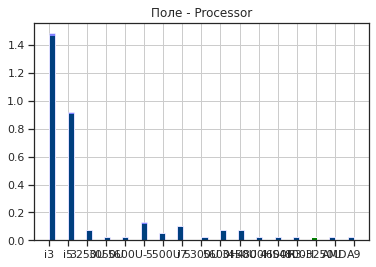

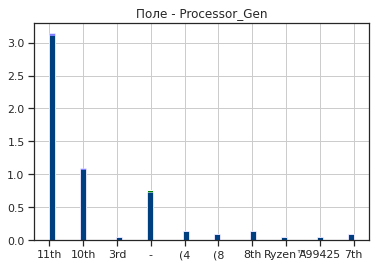

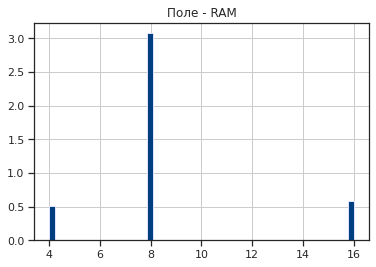

In [52]:
plot_hist_diff(skip, skip_drop, hcols_with_na_temp)

Распределение ассиметричное и от удаления пропусков почти не изменилось. Датасет небольшого размера, поэтому не будем использовать метод заполнения случайными значениями. Пропуски распределены случайно, распределение не выглядит однозначно одномодальным. Из-за ассиметричности заполним пустые значения медианой распределения.

In [53]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):
    """
    Заполнение пропусков в одном признаке
    """
    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [54]:
all_data, filled_data, missed_data = impute_column(skip, 'RAM', 'median')

In [55]:
all_data

array([ 8.,  8.,  8.,  8.,  8.,  8.,  4., 16.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  4.,  8.,  8.,
       16.,  8.,  4.,  8.,  4.,  8.,  8.,  8., 16.,  8.,  8.,  8.,  8.,
        8.,  4., 16.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  8., 16.,  8.,
       16., 16.,  8., 16.,  8.,  8., 16.,  8.,  8., 16.,  8.,  8., 16.,
        8.,  8.,  8.,  8.,  8., 16.,  4.,  8.,  8.,  8.,  8.,  4.,  8.,
        8.,  4., 16.,  4.,  8.,  8., 16.,  8.,  8.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8., 16.,  8., 16.,  8.,  4.,  8.,  8.,  8.,  4.,
        8.,  4.,  4.,  8.,  8., 16.,  8.,  8.,  8.,  4.,  4.,  8.,  8.])

In [56]:
filled_data

array([8., 8., 8., 8., 8., 8., 8., 8.])

In [57]:
missed_data

array([nan, nan, nan, nan, nan, nan, nan, nan])

In [58]:
def research_impute_numeric_column(dataset, num_column, const_value=None):
    strategy_params = ['mean', 'median', 'most_frequent', 'constant']
    strategy_params_names = ['Среднее', 'Медиана', 'Мода']
    strategy_params_names.append('Константа = ' + str(const_value))
    
    original_temp_data = dataset[[num_column]].values
    size = original_temp_data.shape[0]
    original_data = original_temp_data.reshape((size,))
    
    new_df = pd.DataFrame({'Исходные данные':original_data})
       
    for i in range(len(strategy_params)):
        strategy = strategy_params[i]
        col_name = strategy_params_names[i]
        if (strategy!='constant') or (strategy == 'constant' and const_value!=None):
            if strategy == 'constant':
                temp_data, _, _ = impute_column(dataset, num_column, strategy, fill_value_param=const_value)
            else:
                temp_data, _, _ = impute_column(dataset, num_column, strategy)
            new_df[col_name] = temp_data
        
    sns.kdeplot(data=new_df)

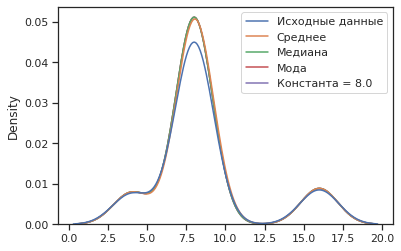

In [59]:
research_impute_numeric_column(skip, 'RAM', 8.0)

## Кодирование категориальных признаков

In [60]:
data_code = pd.read_csv('/content/drive/MyDrive/MMO/laptop.csv', sep=",")

In [61]:
data_code.head()

,Unnamed: 0,Brand,Model,Series,Processor,Processor_Gen,RAM,Hard_Disk_Capacity,OS,Rating,Price
0,0,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,Windows 11 Home,3.7,39040
1,1,DELL,Vostro,NaN,i5,11th,8.0,1 TB HDD,Windows 10 Home,3.6,50840
2,2,ASUS,VivoBook,15,i3,10th,8.0,512 GB SSD,Windows 11 Home,4.3,37940
3,3,DELL,Inspiron,NaN,i3,11th,8.0,1 TB HDD,256 GB SSD,4.4,44440
4,4,ASUS,TUF,Gaming,i5,10th,8.0,512 GB SSD,Windows 10 Home,4.5,57940


In [66]:
!pip install category_encoders
from category_encoders.target_encoder import TargetEncoder as ce_TargetEncoder
data_coded = ce_TargetEncoder().fit_transform(data_code[data_code.columns.difference(['Brand', 'Model', 'RAM'])], data_code['RAM'])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
data_coded

,Hard_Disk_Capacity,OS,Price,Processor,Processor_Gen,Rating,Series,Unnamed: 0
0,8.093023,8.181818,39040,7.379310,9.507246,3.7,8.320000,0
1,8.093023,8.869565,50840,10.777778,9.507246,3.6,8.320000,1
2,10.000000,8.181818,37940,7.379310,7.666667,4.3,7.001479,2
3,8.093023,9.999997,44440,7.379310,9.507246,4.4,8.320000,3
4,10.000000,8.869565,57940,10.777778,7.666667,4.5,11.421634,4
...,...,...,...,...,...,...,...,...
125,8.093023,8.181818,39040,7.379310,9.507246,3.7,8.320000,125
126,8.093023,4.868760,32905,7.379310,5.243303,4.2,8.320000,126
127,8.093023,4.868760,39949,7.379310,7.666667,3.1,8.320000,127
128,8.093023,8.869565,42750,7.379310,9.507246,2.9,7.001479,128


In [68]:
data_code['OS'].unique()

array(['Windows 11 Home', 'Windows 10 Home', '256 GB SSD', 'Windows 10',
       'DOS', nan, 'Chrome OS', '128 GB SSD'], dtype=object)

In [69]:
data_code['Processor'].unique()

array(['i3', 'i5', '3250U', '3050U', '5600U', '-', '5500U', 'i7', '5300U',
       '5600H', '3450U', nan, '4800HS', '4600H', '4800H', 'R3-3250U',
       'AMD', 'A9'], dtype=object)

In [70]:
data_coded['Processor'].unique()

array([ 7.37931034, 10.77777778,  8.07425756,  8.62295082,  5.65437143,
        8.16753728, 13.74498875,         nan])

In [71]:
data_coded['OS'].unique()

array([ 8.18181818,  8.86956522,  9.99999689, 10.39978072,  4.8687604 ,
               nan,  5.24330296,  8.62295082])

In [72]:
#закодировать лейблами категории и конкатенировать
le = LabelEncoder()
category_le = le.fit_transform(data_code['Hard_Disk_Capacity'])

In [73]:
np.unique(category_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [74]:
#преобразуем полученный массив в колонку
data_tempor = np.array(category_le)
data_le = pd.DataFrame(data_tempor, columns=['category_le'])

In [75]:
#объединяем колонки оригинальной таблицы с кодированными колонками 
data_result = pd.concat([data_le['category_le'], data_code.iloc[:, 1:4], data_coded['Processor'], data_code['Price'], data_coded['OS'], data_code[['Model', 'RAM']]], axis=1)

In [76]:
#итоговая таблица с кодированными категориальными признаками.
data_result.head(10)

,category_le,Brand,Model,Series,Processor,Price,OS,Model,RAM
0,0,DELL,Inspiron,NaN,7.379310,39040,8.181818,Inspiron,8.0
1,0,DELL,Vostro,NaN,10.777778,50840,8.869565,Vostro,8.0
2,5,ASUS,VivoBook,15,7.379310,37940,8.181818,VivoBook,8.0
3,0,DELL,Inspiron,NaN,7.379310,44440,9.999997,Inspiron,8.0
4,5,ASUS,TUF,Gaming,10.777778,57940,8.869565,TUF,8.0
5,3,ASUS,Ryzen,3,8.074258,35940,8.869565,Ryzen,8.0
6,3,DELL,Inspiron,Athlon,8.622951,33940,8.181818,Inspiron,4.0
7,5,DELL,Inspiron,NaN,10.777778,69040,10.399781,Inspiron,16.0
8,0,Lenovo,IdeaPad,3,7.379310,37440,8.869565,IdeaPad,8.0
9,5,HP,NaN,NaN,10.777778,56449,8.181818,NaN,8.0


### Нормализация числовых признаков

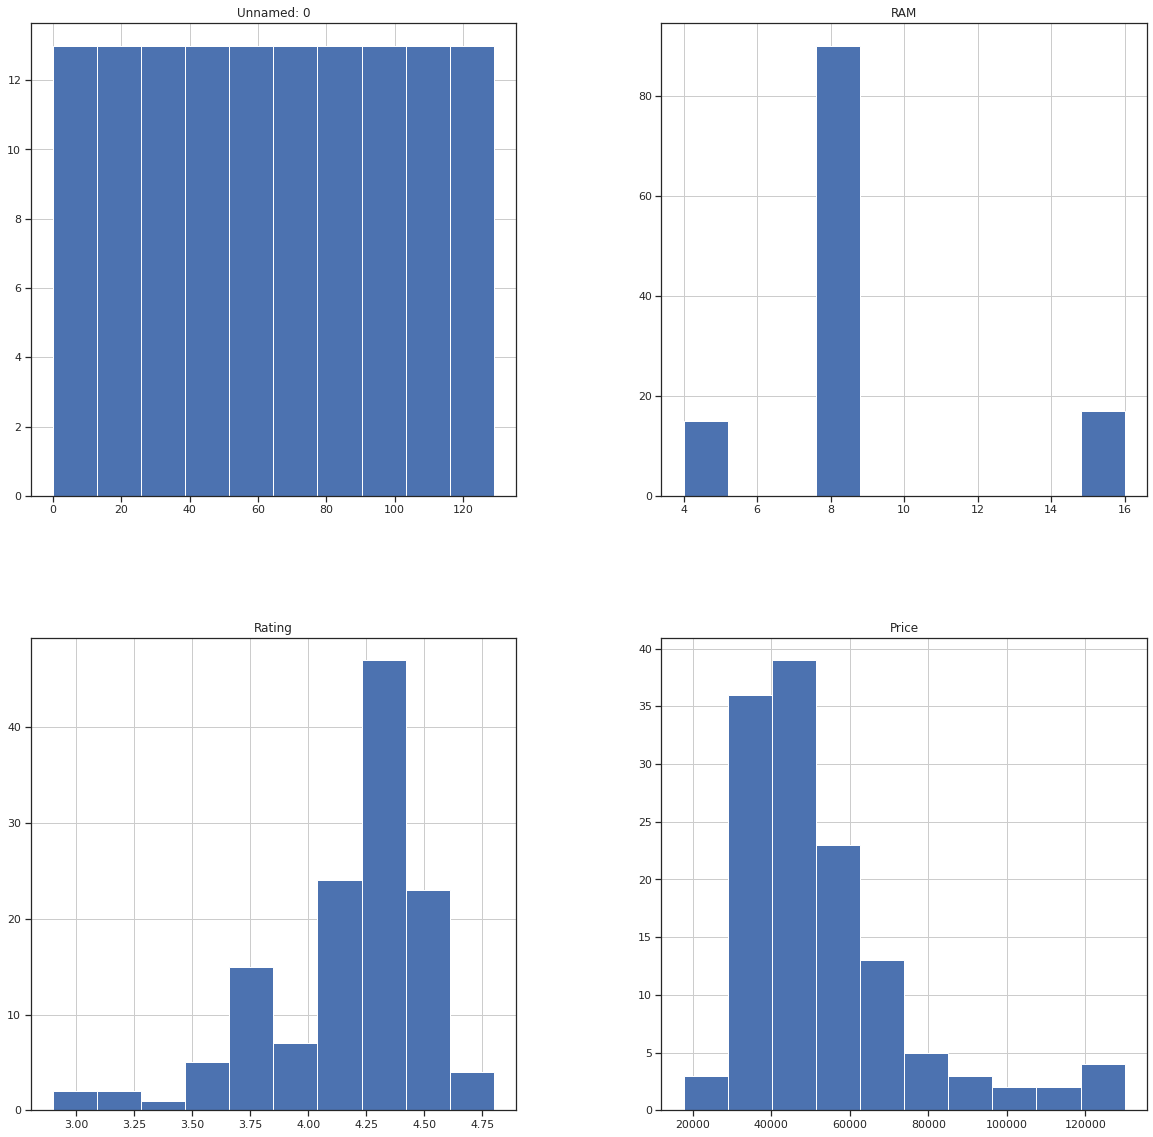

In [77]:
#нормализуем признак из предыдущего датасета
skip.hist(figsize=(20,20))
plt.show()

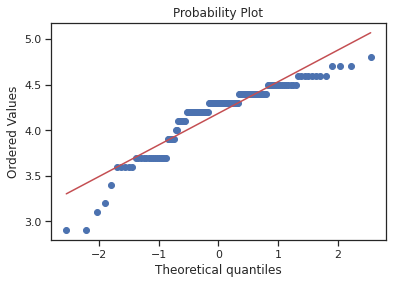

In [78]:
stats.probplot(skip['Rating'], dist="norm", plot = plt)
plt.show()

Оптимальное значение λ = 6.19020443917887


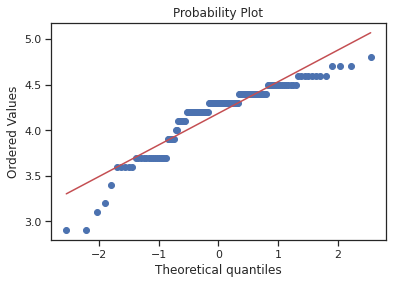

In [79]:
#применяем преобразование Бокса-Кокса.
skip['Rating_bxcx'], param = stats.boxcox(skip['Rating']) 
print('Оптимальное значение λ = {}'.format(param))

stats.probplot(skip['Rating'], dist="norm", plot = plt)
plt.show()

Результат, в целом, плохой, но учитывая степень отклонения исходного распределения от нормальности, ситуация улучшилась.

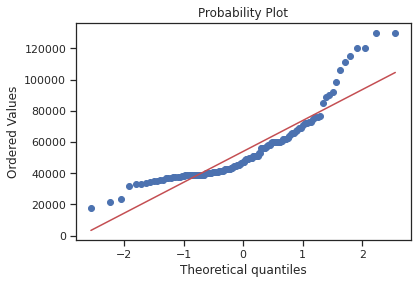

In [80]:
stats.probplot(skip['Price'], dist="norm", plot = plt)
plt.show()

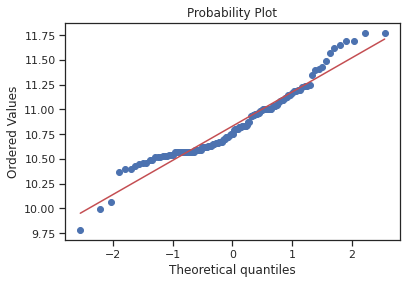

In [81]:
# применяем логарифмическое преобразование
#получаем достаточно неплохой результат
skip['Price_log'] = np.log(skip['Price'])

stats.probplot(skip['Price_log'], dist="norm", plot = plt)
plt.show()